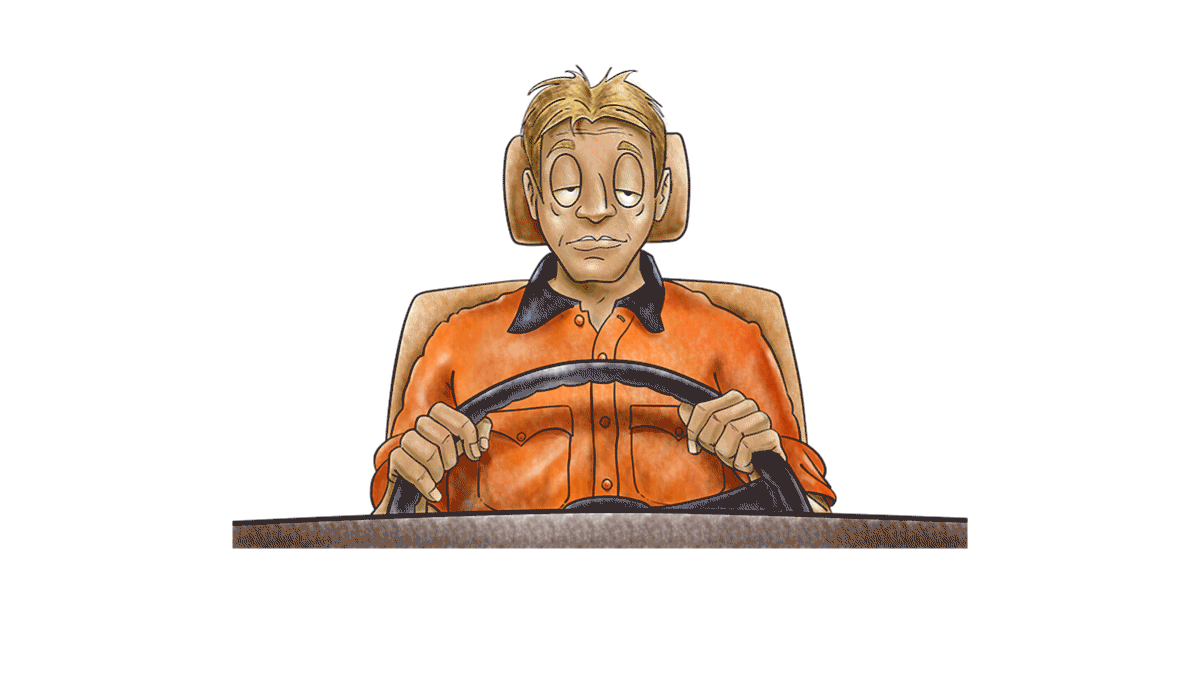

## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

In [93]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split




# labels

In [94]:
labels = os.listdir(r"C:\Users\Addmin\Downloads\train")

In [95]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# visualize random 1 image

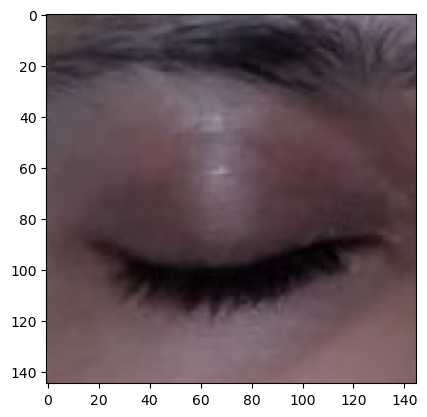

In [96]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\Users\Addmin\Downloads\train\Closed\_0.jpg"))

# image array

In [97]:
a = plt.imread(r"C:\Users\Addmin\Downloads\train\yawn\10.jpg")

# image shape

In [98]:
a.shape

(480, 640, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

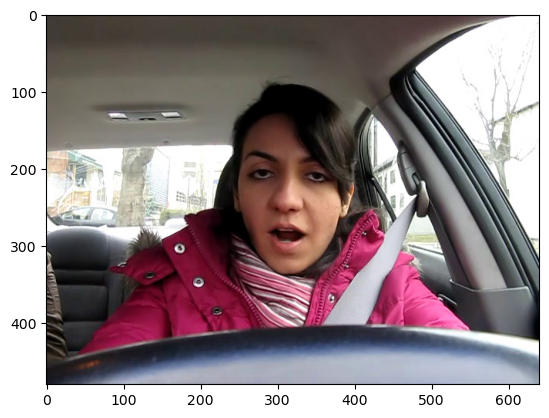

In [99]:
plt.imshow(plt.imread(r"C:\Users\Addmin\Downloads\train\yawn\10.jpg"))

# for yawn and not_yawn. Take only face

In [100]:
def face_for_yawn(direc=r"C:\Users\Addmin\Downloads\train", face_cas_path=r"C:\Users\Addmin\Downloads\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# for closed and open eye

In [101]:
def get_data(dir_path=r"C:\Users\Addmin\Downloads\train", face_cas=r"C:\Users\Addmin\Downloads\haarcascade_frontalface_default.xml", eye_cas=r"C:\Users\Addmin\Downloads\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [102]:
data_train = get_data()

2
3


# extend data and convert array

In [103]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [104]:
new_data = append_data()

0
1
2
3


C:\Users\Addmin\AppData\Local\Temp\ipykernel_16724\2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


# separate label and features

In [105]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [106]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [107]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [108]:
y = np.array(y)

# train test split

In [109]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [110]:
len(X_test)

578

# Not necessary, only use to matching with my pc version

In [111]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [112]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [113]:
tf.__version__

'2.12.0'

# keras version

In [114]:
import keras
keras.__version__

'2.12.0'

# Data Augmentation

In [115]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [124]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X_train and X_test are numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Print the shapes of X_train and X_test to debug
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

# Reshape X_train and X_test to remove extra dimensions
X_train = X_train.reshape(X_train.shape[0], 145, 145, 3)
X_test = X_test.reshape(X_test.shape[0], 145, 145, 3)

# Print the shapes of X_train and X_test after reshaping
print("After reshaping:")
print("X_train shape:", X_train.shape)  # Should be (num_samples, height, width, channels)
print("X_test shape:", X_test.shape)    # Should be (num_samples, height, width, channels)

# Define input shape
input_shape = X_train.shape[1:]

# Define the model architecture
inputs = Input(shape=input_shape)
x = Conv2D(256, (3, 3), activation="relu", padding="same")(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

# Define the two outputs
output_num_members = Dense(4, activation="softmax", name="num_members")(x)
output_age = Dense(1, name="age")(x)

# Create the model
model = Model(inputs=inputs, outputs=[output_num_members, output_age])

# Compile the model
model.compile(
    loss={"num_members": "categorical_crossentropy", "age": "mse"},
    optimizer="adam",
    metrics={"num_members": "accuracy"}
)

# Summary of the model
model.summary()

batch_size = 32  # Define the batch size

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Fit the model using the data generator
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Access the training history
print(history.history)


Original X_train shape: (1347, 145, 145, 3)
Original X_test shape: (578, 145, 145, 3)
After reshaping:
X_train shape: (1347, 145, 145, 3)
X_test shape: (578, 145, 145, 3)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 145, 145, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 145, 145, 25  7168        ['input_18[0][0]']               
                                6)                                                                
                                                                                                  
 max_pooling2d_36 (M

# history

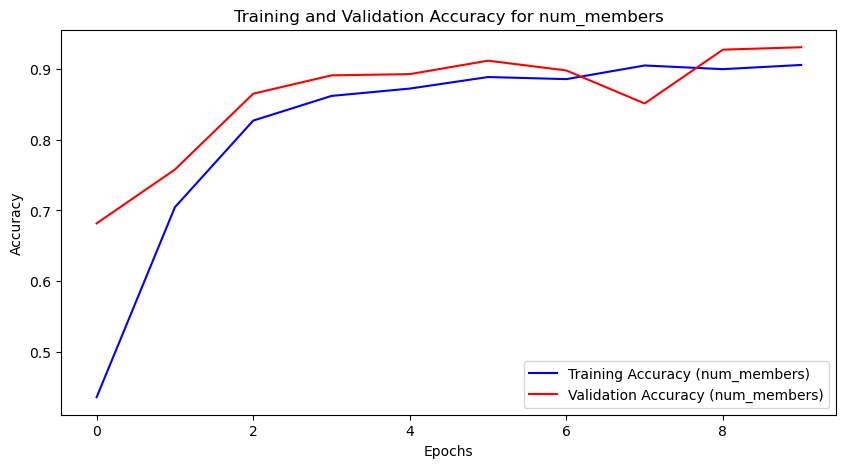

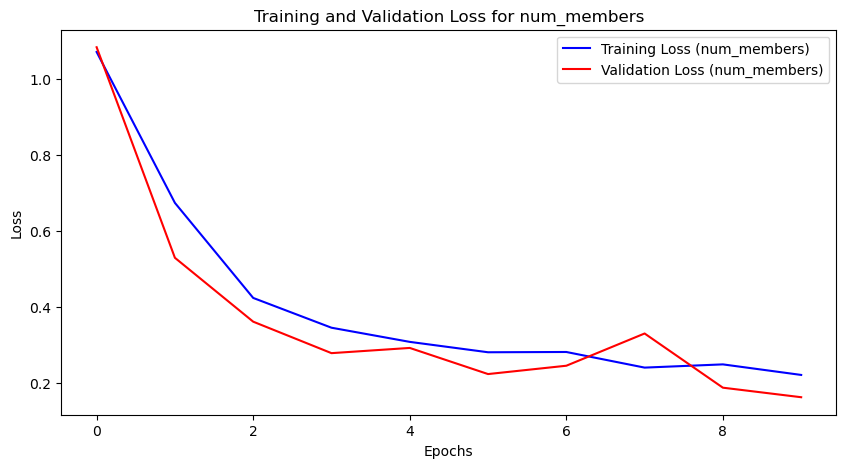

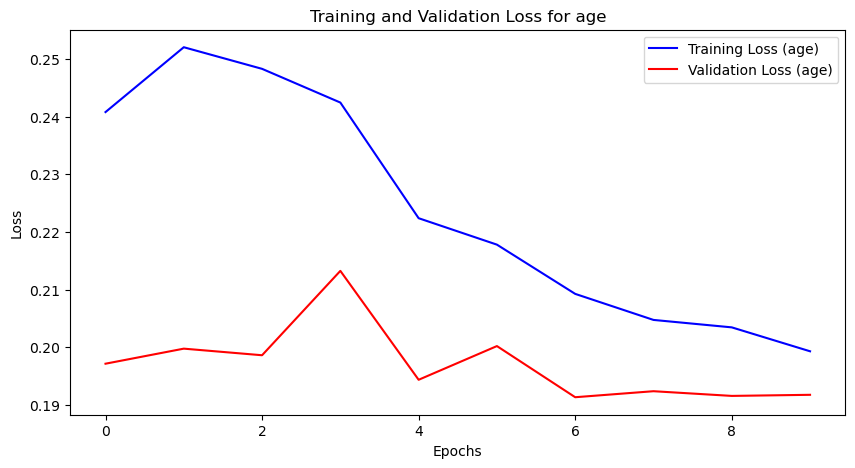

In [125]:
import matplotlib.pyplot as plt

# Extract metrics for 'num_members' output
num_members_accuracy = history.history['num_members_accuracy']
val_num_members_accuracy = history.history['val_num_members_accuracy']
num_members_loss = history.history['num_members_loss']
val_num_members_loss = history.history['val_num_members_loss']

# Extract metrics for 'age' output
age_loss = history.history['age_loss']
val_age_loss = history.history['val_age_loss']

# Define epochs range
epochs = range(len(num_members_accuracy))

# Plot training and validation accuracy for 'num_members'
plt.figure(figsize=(10, 5))
plt.plot(epochs, num_members_accuracy, "b", label="Training Accuracy (num_members)")
plt.plot(epochs, val_num_members_accuracy, "r", label="Validation Accuracy (num_members)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for num_members')
plt.legend()
plt.show()

# Plot training and validation loss for 'num_members'
plt.figure(figsize=(10, 5))
plt.plot(epochs, num_members_loss, "b", label="Training Loss (num_members)")
plt.plot(epochs, val_num_members_loss, "r", label="Validation Loss (num_members)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for num_members')
plt.legend()
plt.show()

# Plot training and validation loss for 'age'
plt.figure(figsize=(10, 5))
plt.plot(epochs, age_loss, "b", label="Training Loss (age)")
plt.plot(epochs, val_age_loss, "r", label="Validation Loss (age)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for age')
plt.legend()
plt.show()


# save model

In [126]:
model.save("drowiness_new6.h5")

In [127]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model\assets


INFO:tensorflow:Assets written to: drowiness_new6.model\assets


# Prediction

In [129]:
import numpy as np

# Get predictions
predictions = model.predict(X_test)

# Assuming `y_test` is one-hot encoded, get the predicted classes
predicted_classes = np.argmax(predictions[0], axis=1)

# If `y_test` is one-hot encoded, get the true classes
true_classes = np.argmax(y_test, axis=1)

# Alternatively, if `y_test` is not one-hot encoded, use `y_test` directly
# true_classes = y_test

# Print classification report
from sklearn.metrics import classification_report

labels_new = ["yawn", "no_yawn", "Closed", "Open"]
print(classification_report(true_classes, predicted_classes, target_names=labels_new))


19/19 [==============================] - 228s 12s/step
              precision    recall  f1-score   support

        yawn       0.91      0.65      0.76        63
     no_yawn       0.75      0.95      0.84        74
      Closed       0.91      0.99      0.94       215
        Open       0.99      0.90      0.94       226

    accuracy                           0.91       578
   macro avg       0.89      0.87      0.87       578
weighted avg       0.92      0.91      0.91       578



In [130]:
predictions

[array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]], dtype=float32),
 array([[44.03061  ],
        [25.147127 ],
        [38.90259  ],
        [56.97611  ],
        [44.60858  ],
        [51.016273 ],
        [27.600174 ],
        [84.45404  ],
        [42.490166 ],
        [49.10076  ],
        [36.08828  ],
        [48.08415  ],
        [53.25405  ],
        [48.948845 ],
        [49.22242  ],
        [50.778152 ],
        [41.7546   ],
        [49.660316 ],
        [33.321415 ],
        [13.9364195],
        [25.197878 ],
        [31.78625  ],
        [36.87034  ],
        [48.397537 ],
        [53.301636 ],
        [49.34327  ],
        [48.56385  ],
        [37.894547 ],
        [43.89341  ],
        [64.23579  ],
        [34.8525   ],
        [66.52422  ],
        [57.71101  ],
        [68.56176  ],
        [40.182533 ],
        [34.03456  ],
        [28.677357 ],


# classification report

In [133]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

# predicting function

In [131]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

In [136]:
model

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [140]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Labels for the output classes
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145

# Function to prepare the image
def prepare(filepath, face_cas=r"C:\Users\Addmin\Downloads\haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255.0
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Load the model
model = load_model("./drowiness_new6.h5")

# Path to a test image
test_image_path = r"C:\Users\Addmin\Downloads\train\yawn\2.jpg"

# Prepare the image
prepared_image = prepare(test_image_path)

# Make a prediction
predictions = model.predict(prepared_image)

# Extract the prediction for the classification output
classification_prediction = predictions[0]

# Print the raw classification prediction output
print("Raw classification prediction output:", classification_prediction)

# Get the predicted class for classification
predicted_class = np.argmax(classification_prediction, axis=1)
print("Predicted class index:", predicted_class)

# Get the class label
predicted_label = labels_new[predicted_class[0]]
print("Predicted label:", predicted_label)

# If needed, extract the prediction for the regression output (age)
age_prediction = predictions[1]
print("Predicted age:", age_prediction)


1/1 [==============================] - 1s 553ms/step
Raw classification prediction output: [[3.0711046e-04 2.4688483e-04 9.9259889e-01 6.8471325e-03]]
Predicted class index: [2]
Predicted label: Closed
Predicted age: [[0.45002258]]


In [145]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Labels for the output classes
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145

# Function to prepare the image
def prepare(filepath, face_cas=r"C:\Users\Addmin\Downloads\haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255.0
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Load the model
model = load_model("./drowiness_new6.h5")

# Path to a test image
test_image_path = r"C:\Users\Addmin\Downloads\train\no_yawn\28.jpg"

# Prepare the image
prepared_image = prepare(test_image_path)

# Make a prediction
predictions = model.predict(prepared_image)

# Extract the prediction for the classification output
classification_prediction = predictions[0]

# Print the raw classification prediction output
print("Raw classification prediction output:", classification_prediction)

# Get the predicted class for classification
predicted_class = np.argmax(classification_prediction, axis=1)
print("Predicted class index:", predicted_class)

# Get the class label
predicted_label = labels_new[predicted_class[0]]
print("Predicted label:", predicted_label)

# If needed, extract the prediction for the regression output (age)
age_prediction = predictions[1]
print("Predicted age:", age_prediction)


1/1 [==============================] - 1s 518ms/step
Raw classification prediction output: [[4.0100553e-04 2.1132092e-04 9.9931526e-01 7.2410970e-05]]
Predicted class index: [2]
Predicted label: Closed
Predicted age: [[0.1991383]]


In [152]:
def predict_image():
    # Ask user to select an image
    filepath = filedialog.askopenfilename()
    
    # Check if a file was selected
    if filepath:
        # Prepare the image for prediction
        prepared_image = prepare(filepath)
        
        # Make a prediction
        predictions = model.predict(prepared_image)
        
        # Extract the predicted class for classification
        classification_prediction = predictions[0]
        predicted_class_index = np.argmax(classification_prediction, axis=1)
        predicted_label = labels_new[predicted_class_index[0]]
        
        # Extract the predicted age
        predicted_age = predictions[1][0][0]
        
        # Show the predicted class and age in a message box
        messagebox.showinfo("Prediction", f"Predicted label: {predicted_label}\nPredicted Age: {predicted_age:.2f}")


In [3]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model("drowiness_new6.h5")

# Labels for the output classes
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

# Function to prepare the image for prediction
def prepare(face_image):
    IMG_SIZE = 145
    img_array = face_image / 255.0
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Function to handle image selection and prediction
def predict_faces_in_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    sleeping_count = 0
    prediction_text = ""

    # For each detected face
    for i, (x, y, w, h) in enumerate(faces):
        face_image = image[y:y+h, x:x+w]
        
        # Prepare the face image for prediction
        prepared_image = prepare(face_image)
        
        # Make a prediction
        predictions = model.predict(prepared_image)
        
        # Extract the predicted class for classification
        classification_prediction = predictions[0]
        predicted_class_index = np.argmax(classification_prediction)
        predicted_label = labels_new[predicted_class_index]
        
        # Extract the predicted age (assuming second part of prediction is age)
        predicted_age = predictions[1][0][0]
        
        # Check if the person is sleeping
        if predicted_label in ["Closed", "yawn"]:
            sleep_status = "Sleeping"
            sleeping_count += 1
        else:
            sleep_status = "Awake"
        
        prediction_text += f"Person {i+1}: {sleep_status}, Age: {predicted_age:.2f}\n"
    
    # Show the results in a message box
    prediction_text += f"\nTotal sleeping persons: {sleeping_count}"
    return prediction_text, sleeping_count

# Function to process video frames and make predictions
def process_video(video_file):
    vid = cv2.VideoCapture(video_file)
    frame_count = 0
    total_sleeping = 0
    
    while vid.isOpened():
        ret, frame = vid.read()
        if not ret:
            break
        frame_count += 1
        if frame_count % 30 == 0:  # Process one frame per second
            prediction_text, sleeping_count = predict_faces_in_image(frame)
            total_sleeping += sleeping_count
    
    vid.release()
    return total_sleeping

# Streamlit interface
st.title("Driver Drowsiness Detection")

# Image prediction
st.header("Image Prediction")
uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    # Convert the file to an OpenCV image
    image = Image.open(uploaded_image)
    image = np.array(image)
    
    # Display the uploaded image
    st.image(image, channels="RGB")
    
    # Predict and display results
    prediction_text, _ = predict_faces_in_image(image)
    st.text(prediction_text)

# Video prediction
st.header("Video Prediction")
uploaded_video = st.file_uploader("Choose a video...", type=["mp4", "avi", "mov"])

if uploaded_video is not None:
    with open("temp_video.mp4", "wb") as f:
        f.write(uploaded_video.read())
    
    # Process the video and display results
    total_sleeping = process_video("temp_video.mp4")
    st.text(f"Total sleeping persons detected in video: {total_sleeping}")


2024-06-07 13:19:02.829 
  command:

    streamlit run c:\Users\Addmin\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
